<center>
    <img src='images/logo.png' width='400px'>
    <h1>MÔN HỌC: THỊ GIÁC MÁY TÍNH (7080518)</h1>
<h2> Chương 2: XỬ LÝ VÀ NÂNG CAO CHẤT LƯỢNG ẢNH - Phần 3</h2>
</center>

---

Xử lý ảnh (Image processing): là quá trình tạo ra ảnh mới từ ảnh có sẵn, VD: tăng độ sáng, cắt ảnh, khử nhiễu,… không tập trung vào việc hiểu nội dung của bức ảnh.

**Nội dung bài học - phần 3:**

**II. Cải thiện chất lượng ảnh:**

1. Làm mờ - mịn  ảnh
    * Làm mịn trung bình
    * Làm mịn trung vị
    * Làm mịn Gaussian
2.  Nhiễu và khử nhiễu trong ảnh
3. Giới thiệu Nhân tích chập
4. Nhân tích chập 2D trong OpenCV

---
*Copyright @nguyenvietanh*

In [1]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('Version OpenCV:', cv2.__version__)

Version OpenCV: 4.11.0


### 1. Làm mờ - mịn ảnh với bộ lọc (Blurring images)
---
* Làm mịn ảnh hay còn gọi là làm mờ là một thao tác xử lý đơn giản và được sử dụng thường xuyên trong xử lý ảnh. Có rất nhiều lý do để làm mịn ảnh, Một trong số lý do đó là để giảm nhiễu.
* Để thực hiện thao tác làm mịn ảnh sử dụng một cửa sổ trượt kích thước k x k (kernel). Kích thước kernel càng lớn thì ảnh càng mịn. Giá trị điểm ảnh ở giữa được tính bằng hàm f của toàn bộ điểm ảnh tại vị trí cửa sổ trượt quét qua.

In [8]:
#Đọc ảnh màu: apples.jpg
img = cv2.imread('images/Apples.jpg',1)
img_color = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [10]:
#Lấy kích thước ảnh ban đầu:
print(img_color.shape)
print("Số pixel :",img_color.size)

(399, 680, 3)
Số pixel : 813960


**1. phương thức lọc trung bình cv2.blur():**

Phương thức này sử dụng cách thức đơn giản nhất. Mỗi pixel điểm ảnh đầu là là trung bình cộng của các pixel lân cận.

**cv2.blur(src, kernel)**

Ý nghĩa các tham số:

1. src: ảnh gốc cần thay đổi kích thước.
2. kernel (width, height): Kích thước cửa sổ trượt

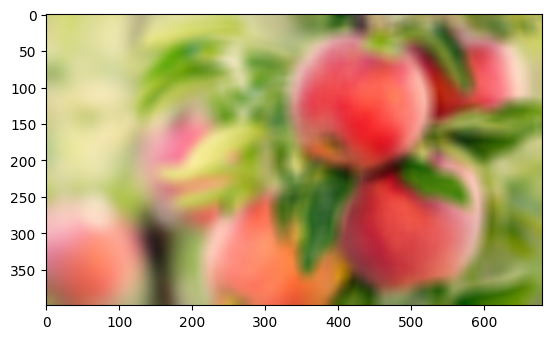

In [11]:
#Sử dụng bộ lọc trung bình trên ảnh:
kernel = (21,21)
img_color_tb = cv2.blur(img_color,kernel)

plt.imshow(img_color_tb)


In [13]:
#Giá trị điểm ảnh của ảnh gốc:
img_color[:,:,0]

array([[202, 204, 204, ..., 112, 135,  93],
       [203, 204, 205, ..., 101, 126,  99],
       [202, 204, 206, ..., 123, 148, 120],
       ...,
       [166, 164, 161, ..., 133, 133, 133],
       [171, 168, 166, ..., 135, 134, 134],
       [175, 172, 169, ..., 135, 134, 133]], dtype=uint8)

In [14]:
#Giá trị điểm ảnh của ảnh sau khi sử dụng bộ lọc trung bình:
img_color_tb[:,:,0]

array([[209, 209, 209, ..., 179, 179, 179],
       [209, 209, 209, ..., 178, 178, 178],
       [209, 209, 210, ..., 177, 177, 177],
       ...,
       [152, 152, 152, ..., 129, 129, 129],
       [152, 152, 152, ..., 129, 129, 129],
       [152, 152, 152, ..., 129, 129, 129]], dtype=uint8)

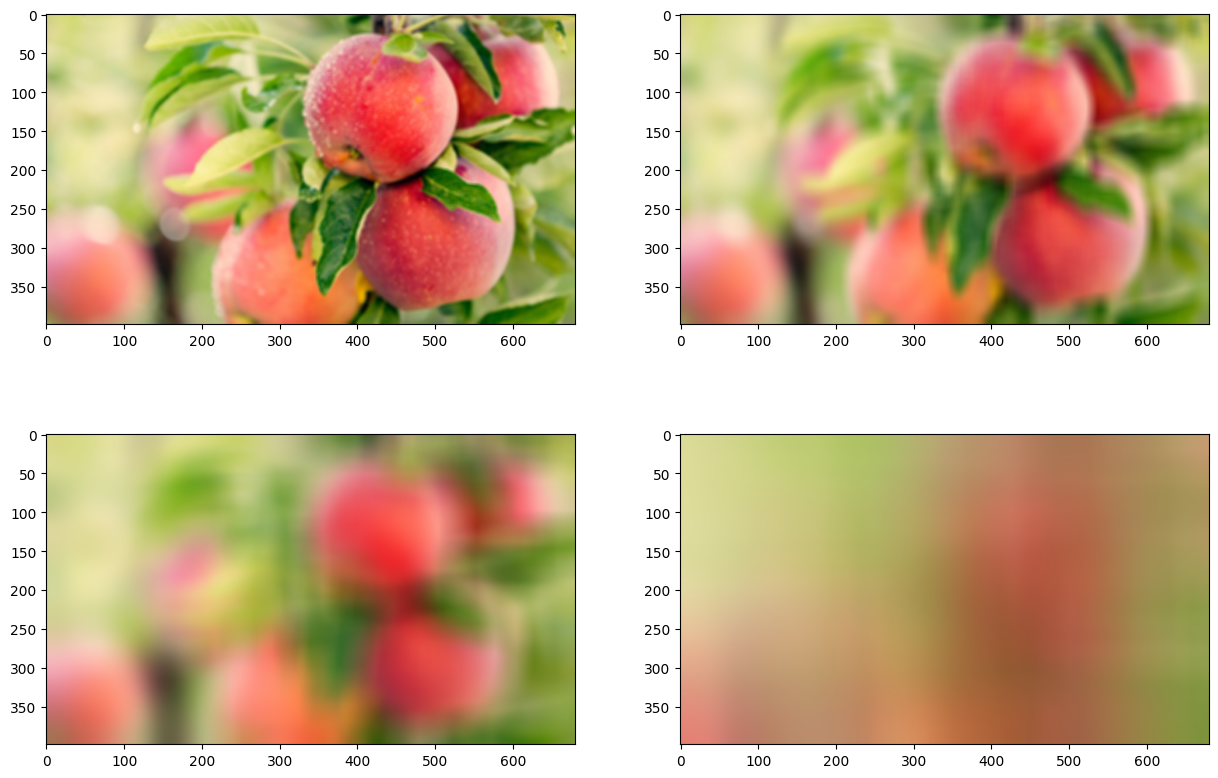

In [15]:
#Làm mịn ảnh với các kernel khác nhau:
img_tb_5 = cv2.blur(img_color,(5,5))

img_tb_15 = cv2.blur(img_color,(15,25))

img_tb_50 = cv2.blur(img_color,(50,50))

img_tb_200 = cv2.blur(img_color,(200,200))


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_tb_5)
plt.subplot(2,2,2)
plt.imshow(img_tb_15)
plt.subplot(2,2,3)
plt.imshow(img_tb_50)
plt.subplot(2,2,4)
plt.imshow(img_tb_200
          )




**2. phương thức lọc trung vị cv2.medianBlur():**
Bộ lọc trung vị chạy qua từng phần tử của tín hiệu (trong trường hợp này là hình ảnh) và thay thế mỗi pixel bằng trung vị của các pixel lân cận (nằm trong vùng lân cận hình vuông xung quanh pixel được đánh giá).

**cv2.MedianBlur(src, ksize)**

Ý nghĩa các tham số:

1. src: ảnh gốc cần thay đổi kích thước.
2. ksize: chỉ truyền vào 1 giá trị, phải là số lẻ và lớn hơn 1, ví dụ 3, 5, 7...


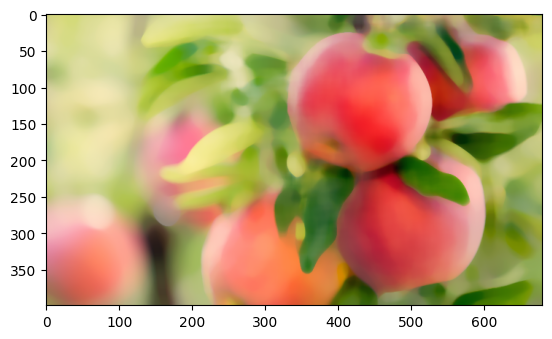

In [16]:
#Sử dụng bộ lọc trung vị trên ảnh:

ksize = 21
img_color_tv  = cv2.medianBlur(img_color,ksize)
plt.imshow(img_color_tv)


In [ ]:
#Giá trị điểm ảnh của ảnh gốc:


In [ ]:
#Giá trị điểm ảnh của ảnh sau khi sử dụng bộ lọc trung vị:


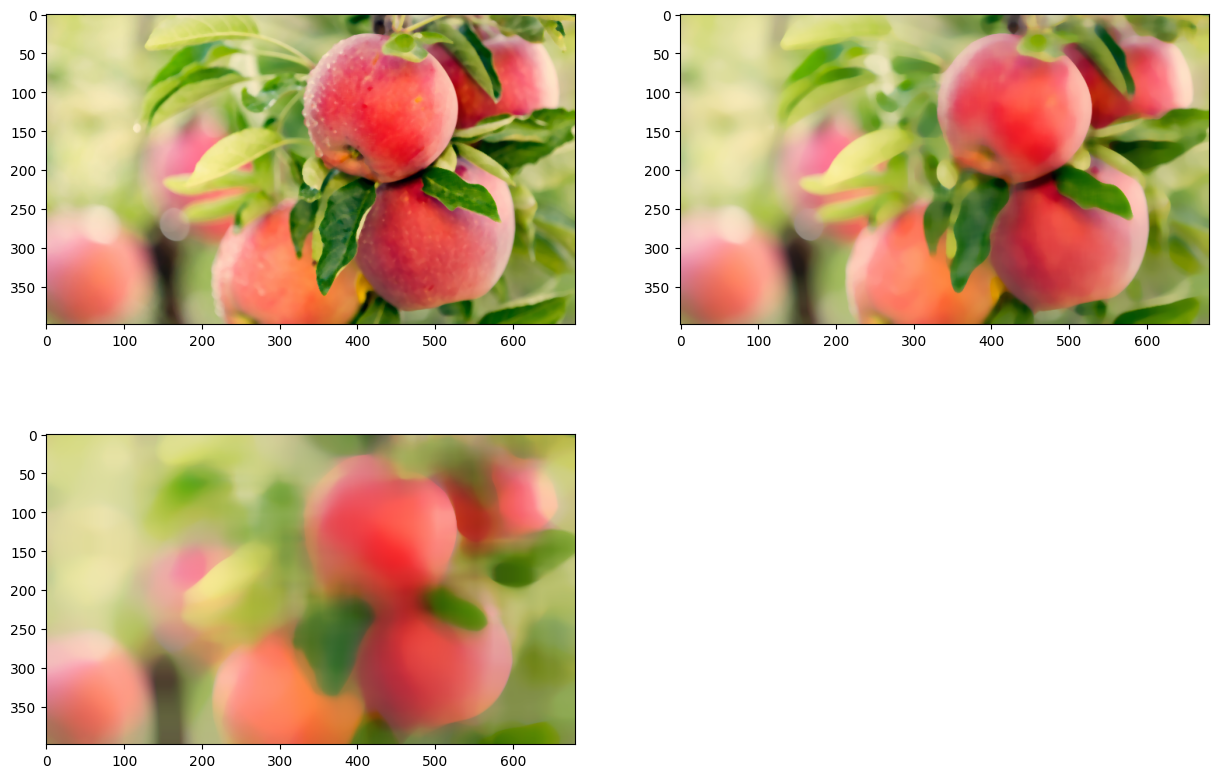

In [20]:
#Làm mịn ảnh với các kernel khác nhau sử dụng bộ lọc trung vị:
#Làm mịn ảnh với các kernel khác nhau:
img_tb_5 = cv2.medianBlur(img_color,5)

img_tb_15 = cv2.medianBlur(img_color,15)

img_tb_50 = cv2.medianBlur(img_color,51)



plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_tb_5)
plt.subplot(2,2,2)
plt.imshow(img_tb_15)
plt.subplot(2,2,3)
plt.imshow(img_tb_50)





**3. phương thức lọc Gaussian cv2.GaussianBlur():**
Đây là một trong những phương pháp làm mịn hữu ích.Lọc Gaussian được thực hiện bằng cách xoay từng điểm trong mảng đầu vào với một hạt nhân Gaussian và sau đó tổng hợp tất cả chúng để tạo ra mảng đầu ra.

**cv2.GaussianBlur(src, kernel,sigmaX, sigmaY)**

Ý nghĩa các tham số:

1. src: ảnh gốc cần thay đổi kích thước.
2. kernel (width, height): Kích thước cửa sổ trượt, phải là số dương và lẻ.
    
    
Xem thêm thông tin về smoothing trong OpenCV: https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html

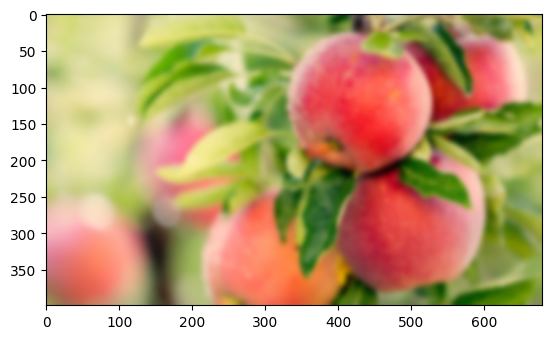

In [21]:
#Sử dụng bộ lọc Gaussian trên ảnh:

img_gau = cv2.GaussianBlur(img_color,(21,21),0,0)
plt.imshow(img_gau)

In [ ]:
#Giá trị điểm ảnh của ảnh gốc:



In [ ]:
#Giá trị điểm ảnh của ảnh sau khi sử dụng bộ lọc Gaussian:




In [ ]:
#Làm mịn ảnh với các kernel khác nhau sử dụng bộ lọc Gaussian:

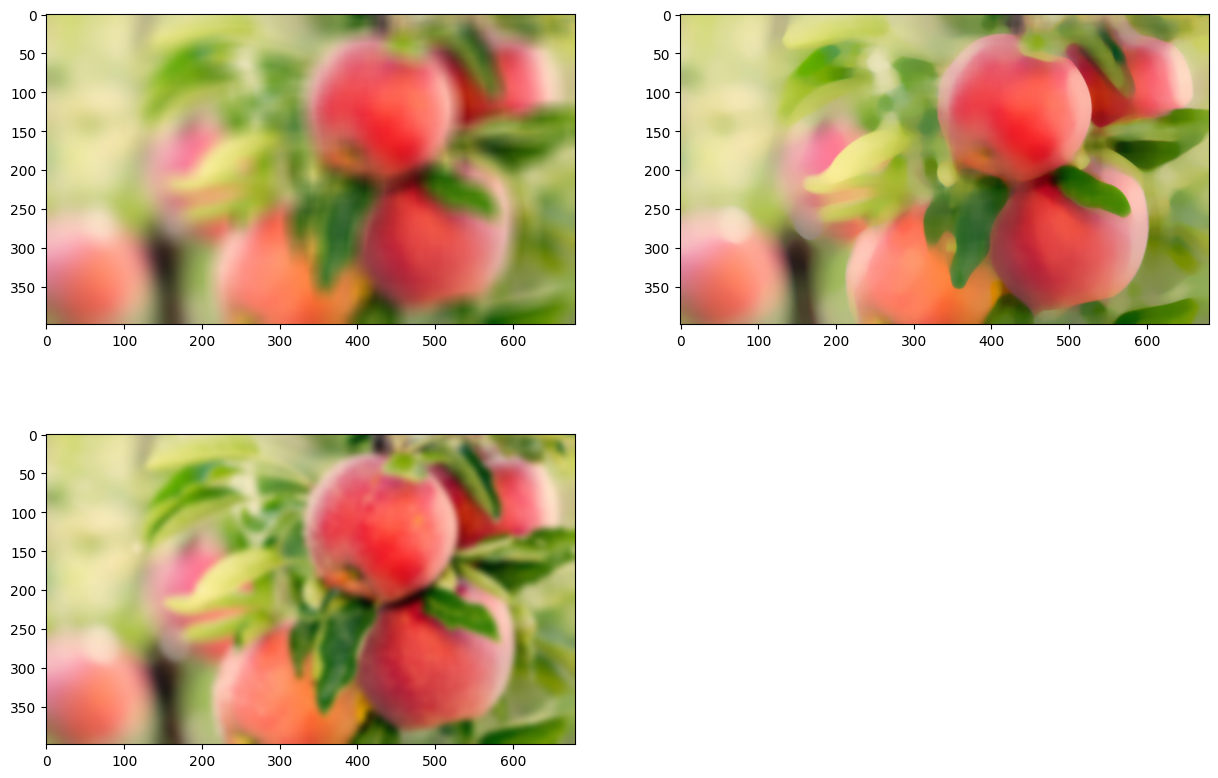

In [22]:
#So sánh các phương pháp làm mịn ảnh khác nhau: Trung bình - Trung vị - Gaussian:
img_tb_25 = cv2.blur(img_color,(25,25))
img_tv_25 = cv2.medianBlur(img_color,25)
img_gau_25 = cv2.GaussianBlur(img_color,(25,25),0,0)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_tb_25)
plt.subplot(2,2,2)
plt.imshow(img_tv_25)
plt.subplot(2,2,3)
plt.imshow(img_gau_25)





## THỰC HÀNH 2.8: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh images/Thuchanh2_8.jpeg, dạng xám và hiển thị ảnh

**Yêu cầu 2:** Sử dụng phương pháp làm mịn trung bình với kernel 5x5, 10x10, 20x30 và hiển thị kết quả

**Yêu cầu 3:** Sử dụng phương pháp làm mịn trung vị với k =  7, 11, 21 và hiển thị kết quả

**Yêu cầu 4:** Sử dụng phương pháp làm mịn Gaussian với kernel = (7,7) và sigmaY, sigmaY lần lượt là (0,0); (0,20); (20,0) và hiển thị kết quả

<img src='images/Thuchanh2_8.jpeg' width='400px'>

In [23]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}


## 2. Nhiễu và khử nhiễu trong ảnh
---
Nhiễu xuất hiện trong quá trình thu nhận ảnh, số hoá và truyền ảnh. 
* Cảm biến ảnh có thể bị ảnh hưởng bởi các điều kiện môi trường.
* Nhiễu có thể can thiệp vào ảnh trong quá trình truyền ảnh.
* Lượng tử hoá
* Số hoá.

Ảnh nhiễu được biểu diễn bằng biểu thức:

g(x,y) = f(x,y) + ⍺(x,y)

Trong đó:

* f(x,y): Ảnh gốc
* ⍺(x,y): Nhiễu
* g(x,y): Ảnh sau khi bị nhiễu tác động.


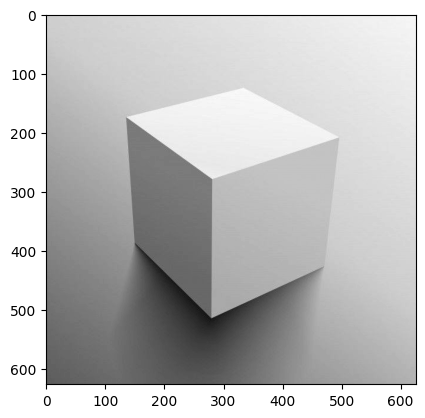

In [24]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

# Đọc ảnh
img = cv2.imread('images/pic_square.jpeg',0)
m,n = img.shape[:2]

plt.imshow(img,cmap='gray')
plt.show()

## Một số loại nhiễu cơ bản
---
1. Nhiễu Gaussian
2. Nhiễu Rayleigh 
3. Nhiễu Erlang (Gammar)
4. Nhiễu hàm mũ
5. Nhiễu đồng nhất (Uniform) 
6. Nhiễu muối tiêu

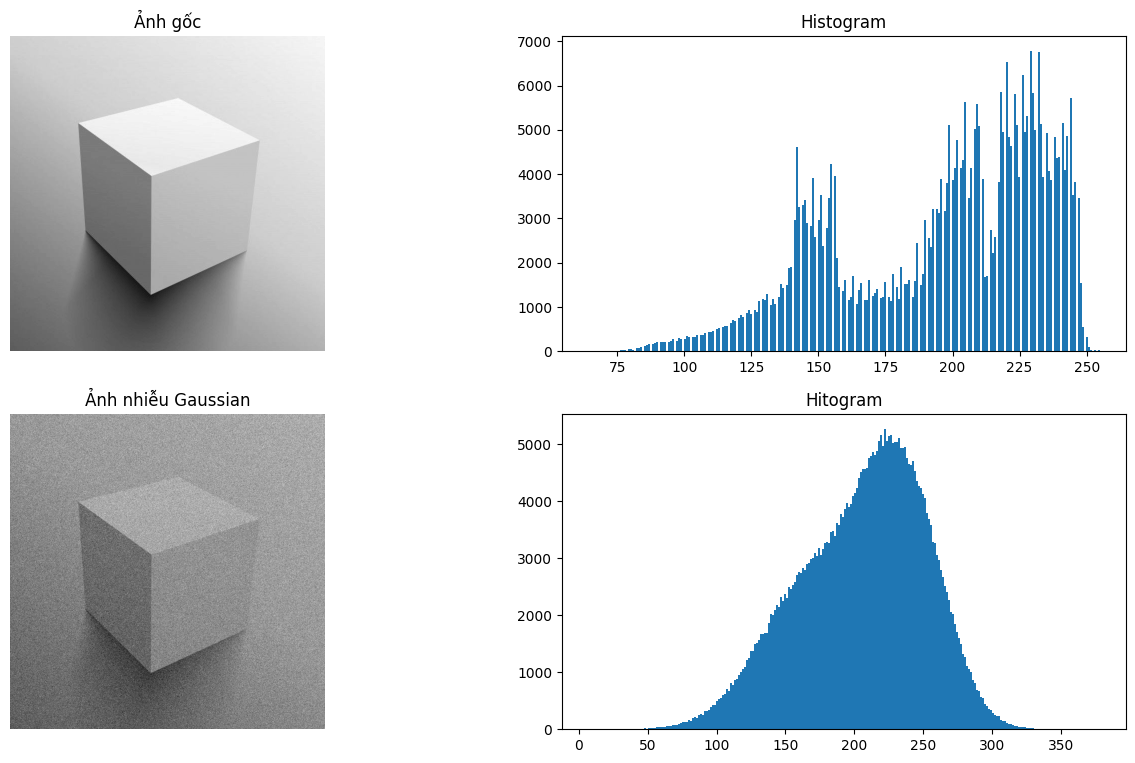

In [25]:
# Thêm nhiễu Gaussian vào ảnh img
gia_tri_TB = 10
phuong_sai = 25
noise = np.random.normal(loc=gia_tri_TB,scale=phuong_sai,size=(m,n))
Gau_noisy_img = img + noise

# 1. Hiển thị ảnh gốc, ảnh nhiễu và histogram
# Tạo cửa số 1 để hiển thị ảnh cho nhiễu Gaussian
fig1 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
#Tạo 9 vùng vẽ con
(ax1, ax2), (ax3, ax4) = fig1.subplots(2, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Histogram')
# Hiển thị ảnh nhiễu Gaussian
ax3.imshow(Gau_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu Gaussian')
ax3.axis('off')
# Hiển thị histogram ảnh nhiễu gaussian
ax4.hist(Gau_noisy_img.flatten(),bins=256)
ax4.set_title('Hitogram')
plt.show()

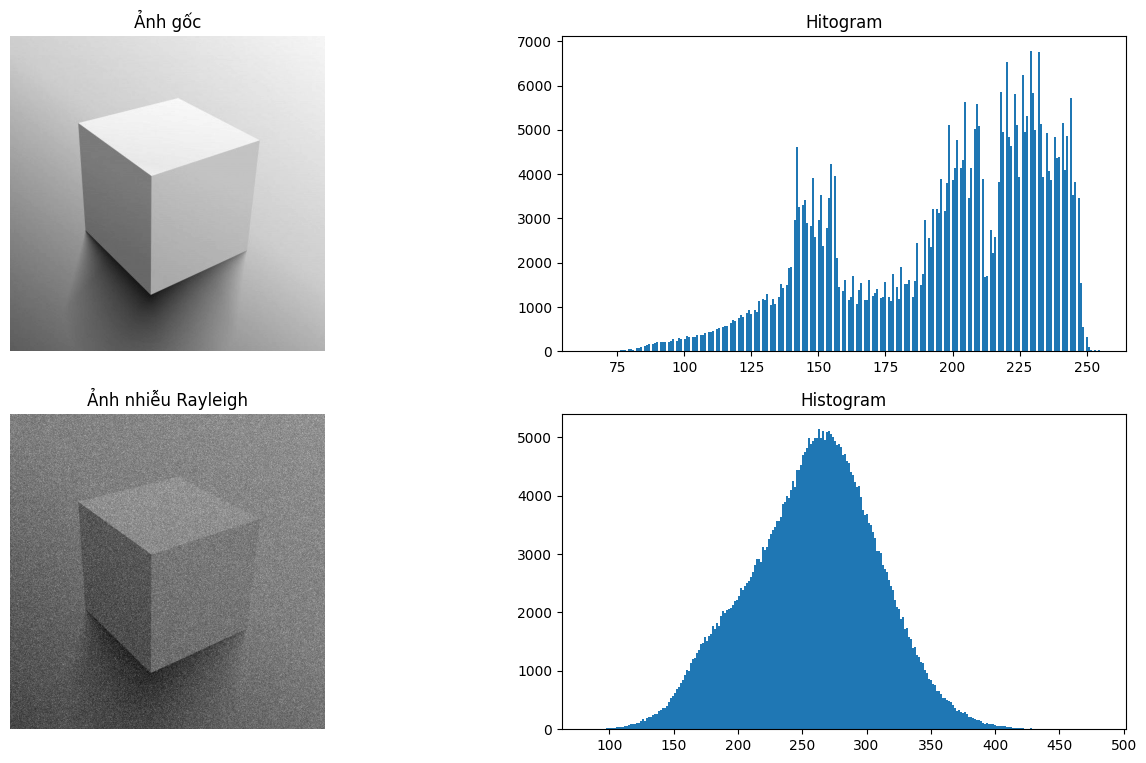

In [26]:
# Thêm nhiễu Rayleigh vào ảnh img
phuong_sai = 50
noise = np.random.rayleigh(scale=phuong_sai,size=(m,n))
Ray_noisy_img = img + noise

# 2. Tạo cửa số 2 để hiển thị ảnh cho nhiễu Rayleigh
fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
#Tạo 9 vùng vẽ con
(ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Hitogram')
# Hiển thị ảnh nhiễu Rayleigh
ax3.imshow(Ray_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu Rayleigh')
ax3.axis('off')
# Hiển thị histogram ảnh nhiễu Rayleigh
ax4.hist(Ray_noisy_img.flatten(),bins=256)
ax4.set_title('Histogram')
plt.show()

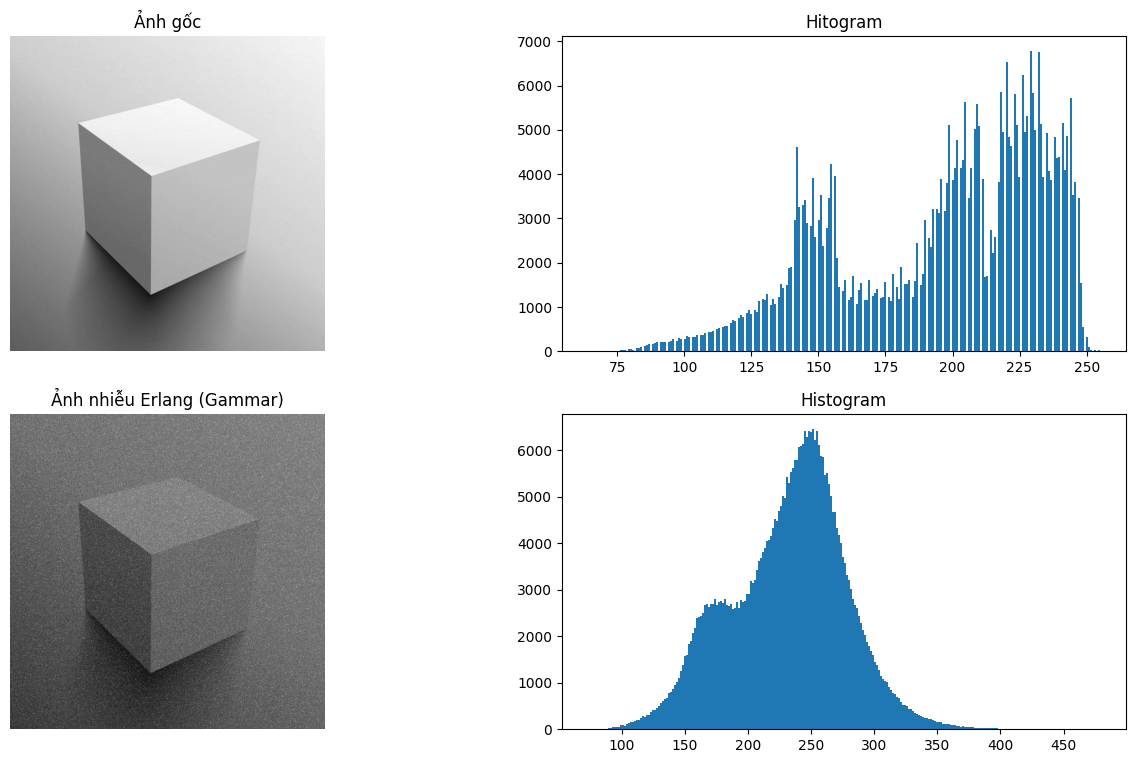

In [27]:
# Thêm nhiễu Erlang (Gammar) vào ảnh img
K = 2.0
phuong_sai = 18
noise = np.random.gamma(shape=K,scale=phuong_sai,size=(m,n))
Gam_noisy_img = img + noise

# 3. Tạo cửa số 3 để hiển thị ảnh cho nhiễu Erlang (Gamma)
fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
#Tạo 9 vùng vẽ con
(ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Hitogram')
# Hiển thị ảnh nhiễu Erlang (Gammar)
ax3.imshow(Gam_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu Erlang (Gammar)')
ax3.axis('off')
# Hiển thị histogram ảnh nhiễu Erlang (Gammar)
ax4.hist(Gam_noisy_img.flatten(),bins=256)
ax4.set_title('Histogram')
plt.show()

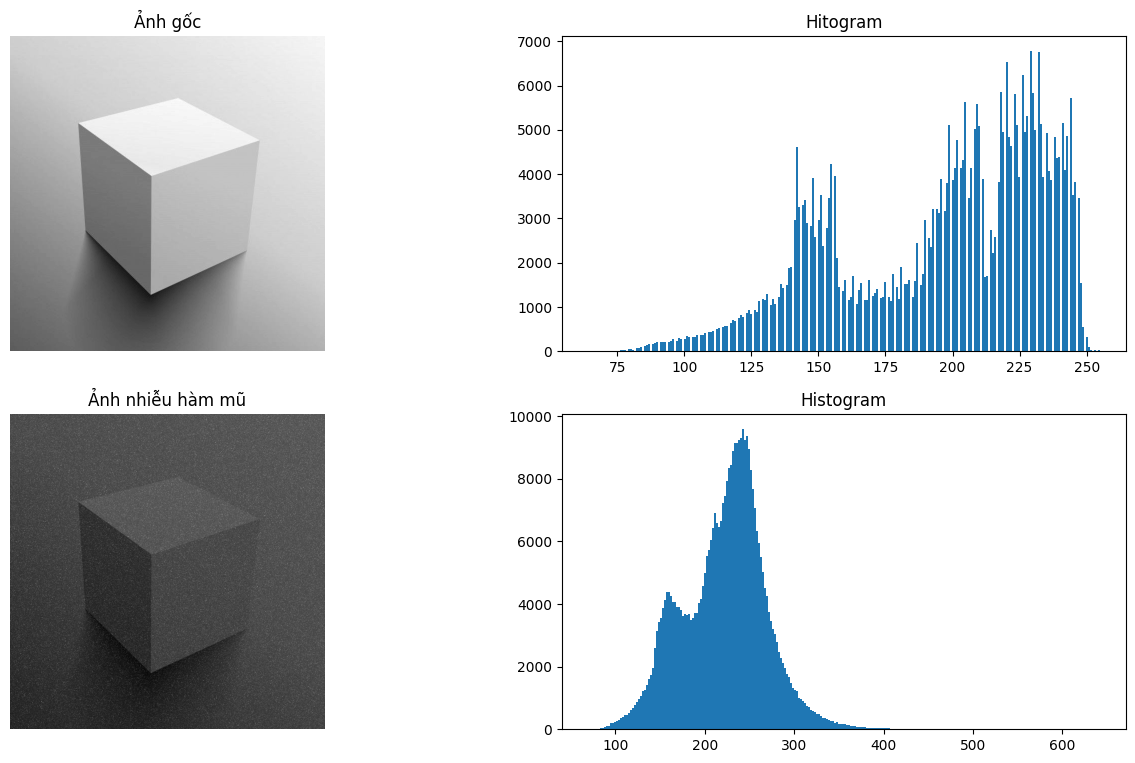

In [28]:
# Thêm nhiễu hàm mũ vào ảnh img
phuong_sai = 26
noise = np.random.exponential(scale=phuong_sai,size=(m,n))
Exp_noisy_img = img + noise

# 4. Tạo cửa số 4 để hiển thị ảnh cho nhiễu nhiễu hàm mũ
fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
#Tạo 4 vùng vẽ con
(ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Hitogram')
# Hiển thị ảnh nhiễu nhiễu hàm mũ
ax3.imshow(Exp_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu hàm mũ')
ax3.axis('off')
# Hiển thị histogram ảnh nhiễu nhiễu hàm mũ
ax4.hist(Exp_noisy_img.flatten(),bins=256)
ax4.set_title('Histogram')
plt.show()


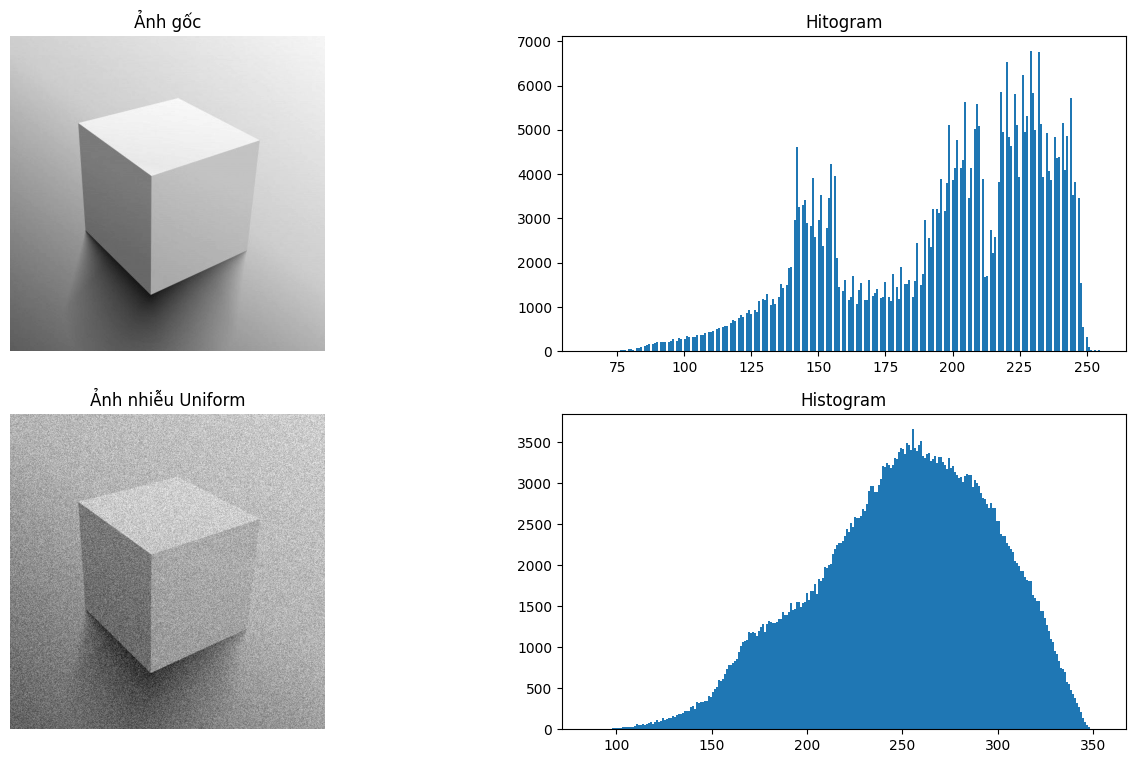

In [29]:
# Thêm nhiễu Uniform vào ảnh img
a,b = 10,100
noise = np.random.uniform(low=a,high=b,size=(m,n))
Uni_noisy_img = img + noise

# 5. Tạo cửa số 5 để hiển thị ảnh cho nhiễu nhiễu Uniform
fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
#Tạo 4 vùng vẽ con
(ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Hitogram')
# Hiển thị ảnh nhiễu nhiễu Uniform
ax3.imshow(Uni_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu Uniform')
ax3.axis('off')
# Hiển thị histogram ảnh nhiễu Uniform
ax4.hist(Uni_noisy_img.flatten(),bins=256)
ax4.set_title('Histogram')
plt.show()


## Nhiễu Muối - Tiêu
---

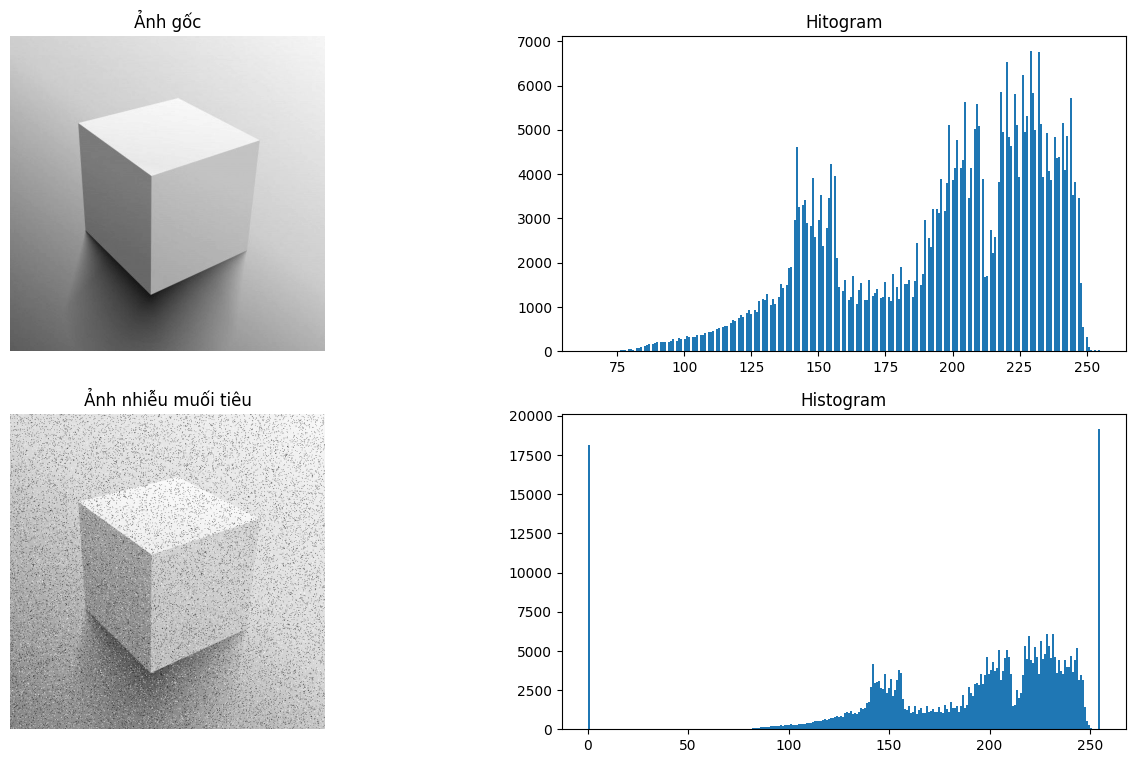

In [30]:
# Thêm nhiễu muối tiêu (add salt and pepper) vào ảnh img
number_black = int(m*n*0.05)  # định nghĩa số điểm đen
number_white = int(m*n*0.05)  # định nghĩa số điểm trắng
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..m
# Giá trị này sẽ biểu diễn tọa độ điểm đen theo hàng
m_blacks = np.random.randint(0,m,number_black)
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..n
# Giá trị này sẽ biểu diễn tọa độ điểm đen theo cột
n_blacks = np.random.randint(0,n,number_black)
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..m
# Giá trị này sẽ biểu diễn tọa độ điểm trắng theo hàng
m_whites = np.random.randint(0,m,number_white)
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..n
# Giá trị này sẽ biểu diễn tọa độ điểm trắng theo cột
n_whites = np.random.randint(0,n,number_white)

SP_noisy_img = np.copy(img) # Sao chép ảnh img để tạo ảnh SP_noisy_img
# Thiết lập mức xám = 0 (điểm đen) cho điểm ảnh có tọa độ (m_blacks,n_blacks)
SP_noisy_img[m_blacks,n_blacks] = 0
# Thiết lập mức xám = 255 (điểm trắng) cho điểm ảnh có tọa độ (m_whites,n_whites)
SP_noisy_img[m_whites,n_whites] = 255


# 6. Tạo cửa số 6 để hiển thị ảnh cho nhiễu nhiễu muối tiêu (nhiễu xung)
fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
#Tạo 4 vùng vẽ con
(ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Hitogram')
# Hiển thị ảnh nhiễu nhiễu muối tiêu (nhiễu xung)
ax3.imshow(SP_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu muối tiêu')
ax3.axis('off')
# Hiển thị histogram ảnh nhiễu muối tiêu (nhiễu xung)
ax4.hist(SP_noisy_img.flatten(),bins=256)
ax4.set_title('Histogram')
plt.show()

## Sử dụng bộ lọc làm mịn để khử nhiễu trong ảnh:
---

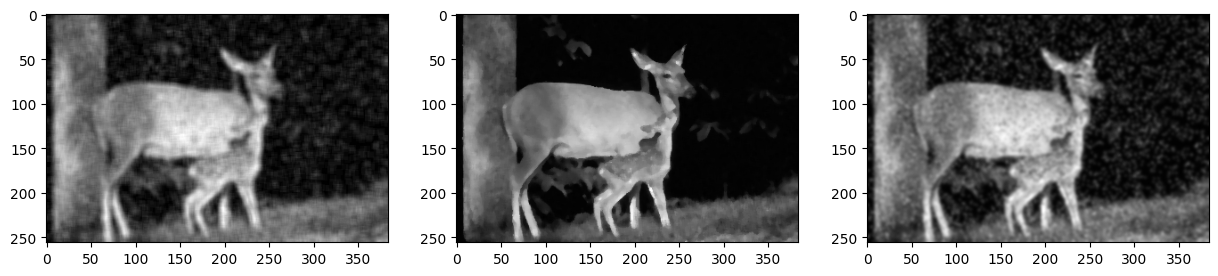

In [54]:

noisy_img = cv2.imread("images/deer_salt.jpg",0)
noisy_img_1 = cv2.blur(noisy_img,(7,7))
noisy_img_2 = cv2.medianBlur(noisy_img,5)
noisy_img_3 = cv2.GaussianBlur(noisy_img,(9,9),0,0)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(noisy_img_1,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(noisy_img_2,cmap='gray')


plt.subplot(1,3,3)
plt.imshow(noisy_img_3,cmap='gray')

In [ ]:
#TÙy chỉnh tham số của Trung vị

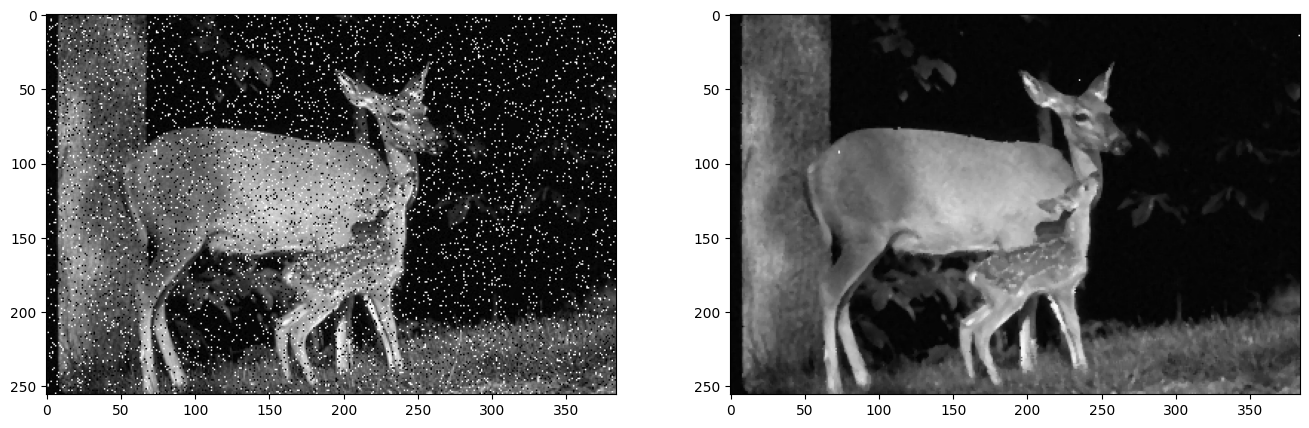

In [57]:
img_deer_ok = cv2.medianBlur(noisy_img,3)

plt.figure(figsize=(25,15))
plt.subplot(1,3,1)
plt.imshow(noisy_img,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(img_deer_ok,cmap='gray')



## THỰC HÀNH 2.9: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh images/Thuchanh2_9_1.jpeg. Lựa chọn phương pháp khử nhiễu và các tham số phù hợp để thu được ảnh khử nhiễu tốt nhất. Lưu ảnh đã xử lý vào thư mục images/Saves/MSV_brain.png

<img src='images/Thuchanh2_9_1.jpeg' width='200px'>

**Yêu cầu 2:** Sinh viên đọc ảnh images/Thuchanh2_9_2.png và hiển thị ảnh. Lựa chọn phương pháp khử nhiễu và các tham số phù hợp để thu được ảnh khử nhiễu tốt nhất. Lưu ảnh đã xử lý vào thư mục images/Saves/MSV_plane.png

<img src='images/Thuchanh2_9_2.png' width='200px'>

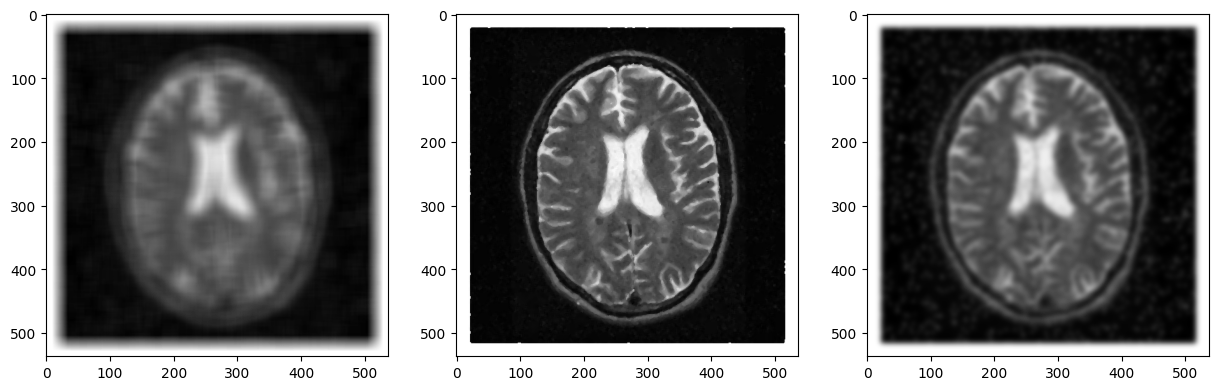

In [84]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}
img_brain = cv2.imread('images/Thuchanh2_9_1.jpeg',0)

img_brain_1 = cv2.blur(img_brain,(25,25))
img_brain_2 = cv2.medianBlur(img_brain,5)
img_brain_3 = cv2.GaussianBlur(img_brain,(25,25),0,0)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img_brain_1,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(img_brain_2,cmap='gray')

plt.subplot(1,3,3)
plt.imshow(img_brain_3,cmap='gray')



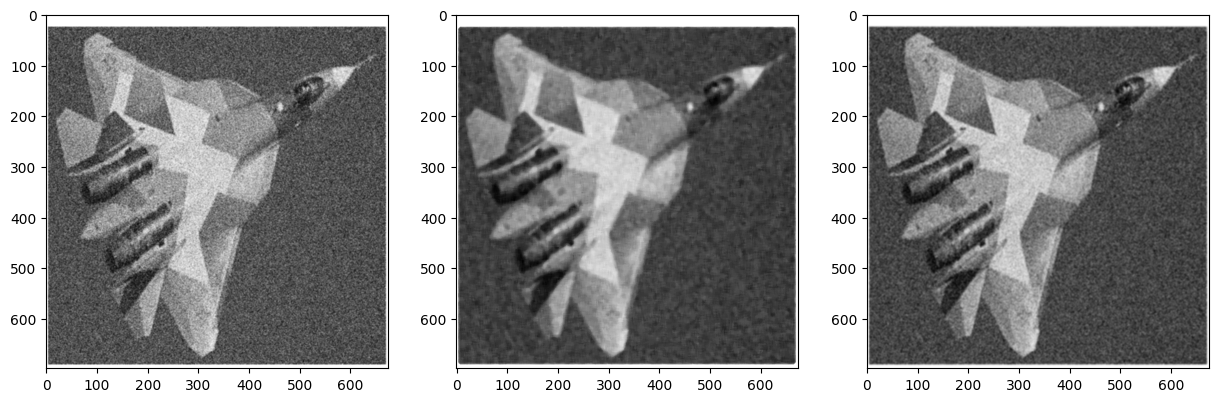

In [82]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}
img_brain = cv2.imread('images/Thuchanh2_9_2.png',0)

img_brain_1 = cv2.blur(img_brain,(3,3))
img_brain_2 = cv2.medianBlur(img_brain,9)
img_brain_3 = cv2.GaussianBlur(img_brain,(7,7),0,0)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img_brain_1,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(img_brain_2,cmap='gray')

plt.subplot(1,3,3)
plt.imshow(img_brain_3,cmap='gray')



## 3. Nhân tích chập - Lọc ảnh 2D (Convolution)
---
Nguyên tắc chung của các phương pháp lọc là cho ma trận ảnh nhân với một ma trận lọc (Kernel). Ma trận lọc lọc (Kernel) còn có thể được gọi là cửa sổ chập (trong phép nhân chập), cửa sổ lọc, mặt nạ,…Việc nhân ảnh với ma trận lọc giống như việc trượt ma trận lọc theo hàng trên ảnh và nhân với từng vùng của ảnh, cộng các kết quả lại tạo thành kết quả của điểm ảnh trung tâm.

Với mỗi phép lọc ta có những ma trận lọc (Kernel) khác nhau, không có một quy định cụ thể nào cho việc xác định M. Kích thước ma trận M là một số lẻ. Ví dụ: 3x3, 5x5.

OpenCV hỗ trợ phương thức lọc ảnh 2D:
 **cv2.filter2D(img,ddepth, kernel)**
 
 Trong đó:
1. img: ảnh gốc muốn áp dụng bộ lọc
2. ddepth: Độ sâu của ảnh đầu ra; -1: độ sâu của ảnh đầu ra bằng độ sâu của ảnh đầu vào.
3. kernel: ma trận lọc

https://www.geeksforgeeks.org/python-opencv-filter2d-function/

https://setosa.io/ev/image-kernels/

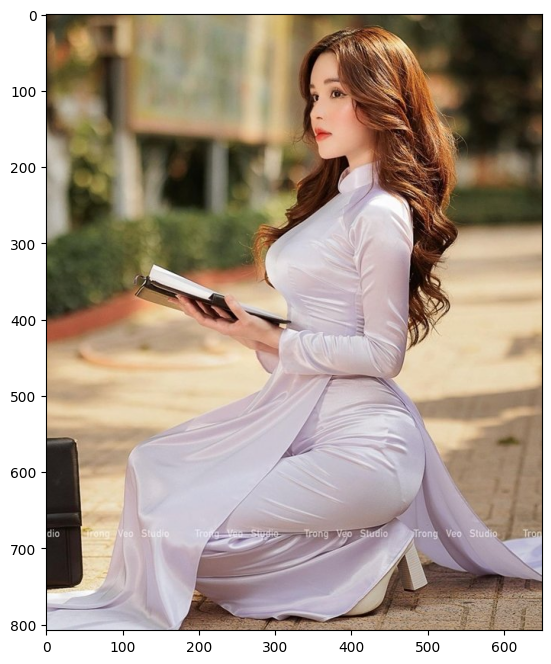

In [12]:
#Đọc ảnh:
img = cv2.imread('images/Pic_1.jpg',1)

#Đổi hệ màu:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Hiển thị ảnh:
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.show()

## Một số bộ lọc thông dụng:
---
### 1. Bộ lọc identity:

In [13]:
#Khởi tạo kernel:
kernel_identity = np.array([[0,0,0],
                           [0,1,0],
                          [0,0,0]])

print(kernel_identity)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


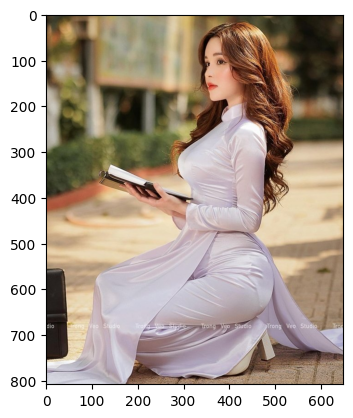

In [14]:
#Thực hiện lọc ảnh với kernel ở trên:
img_identity = cv2.filter2D(img,-1,kernel_identity)
plt.imshow(img_identity)

### 2. Bộ lọc phát hiện góc của ảnh (Edge detection))

In [15]:
matrix = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])
print(matrix)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


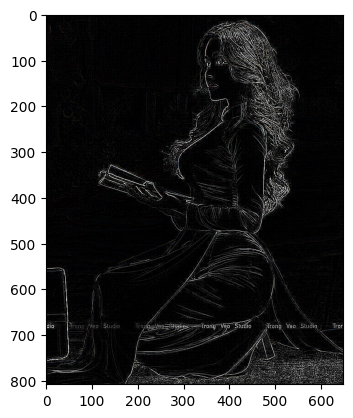

In [16]:
img_identity = cv2.filter2D(img,-1,matrix)
plt.imshow(img_identity)

In [17]:
#Thực hiện lọc ảnh với kernel ở trên:




### 3. Bộ lọc sắc nét Sharpen kernel:

In [18]:
#Khởi tạo kernel:
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])


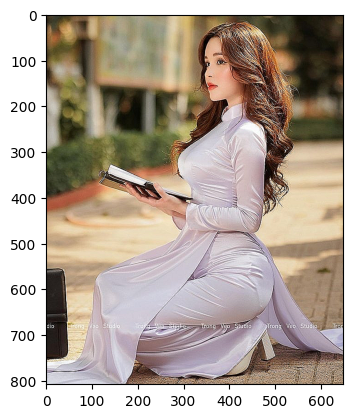

In [19]:
#Thực hiện lọc ảnh với kernel ở trên:
img_sharpen = cv2.filter2D(img,-1,kernel_sharpen)
plt.imshow(img_sharpen)

### 4. Bộ lọc làm mịn blur():
---
Tương tự với bộ lọc trung bình cv2.blur()

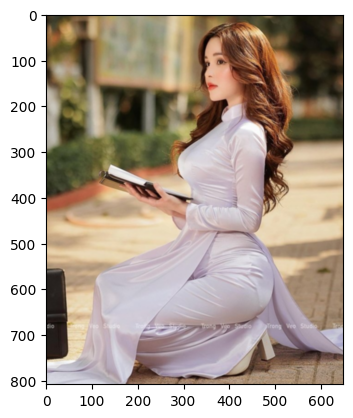

In [22]:
#Khởi tạo kernel:
kernel_blur = cv2.blur(img,(3,3))
plt.imshow(kernel_blur)



In [ ]:
#Thực hiện lọc ảnh với kernel ở trên:



## THỰC HÀNH 2.10: 
---
Yêu cầu :
* Sinh viên đọc và hiển thị ảnh images/Thuchanh2_10. ở chế độ mặc định.
* Áp dụng 4 bộ lọc khác nhau trên ảnh và hiển thị kết quả (xem chi tiết các bộ lọc trong slide bài giảng)
<img src = 'images/Thuchanh2_10.png' width='300px'>

https://setosa.io/ev/image-kernels/

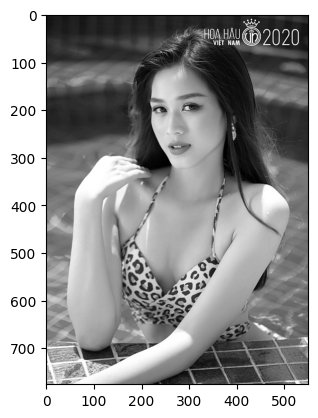

In [2]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}
img = cv2.imread("images/Thuchanh2_10.png",0)
plt.imshow(img,cmap="gray")

In [26]:
array1 = np.array([[0.0625,0.125,0.0625],
          [0.125,0.25,0.125],
          [0.0625,0.125,0.0625]])
array2 = np.array([[-2,-1,0],
          [-1,1,1],
          [0,1,2]])
array3 = np.array([[-1,-2,-1],
          [0,0,0],
          [1,2,1]])

array4 = np.array([[-1,-1,-1],
          [-1,8,-1],
          [-1,-1,-1]])

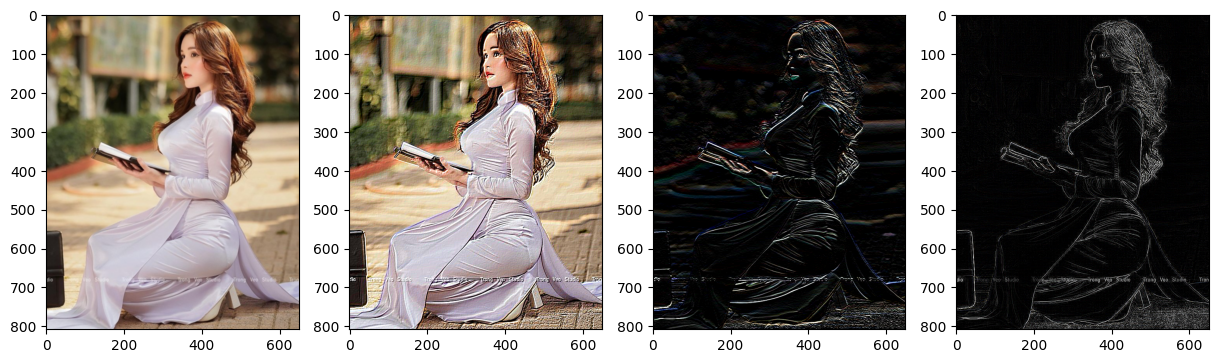

In [28]:
img_identity_1 = cv2.filter2D(img,-1,array1)
img_identity_2 = cv2.filter2D(img,-1,array2)
img_identity_3 = cv2.filter2D(img,-1,array3)
img_identity_4 = cv2.filter2D(img,-1,array4)

plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.imshow(img_identity_1)

plt.subplot(1,4,2)
plt.imshow(img_identity_2)
plt.subplot(1,4,3)
plt.imshow(img_identity_3)
plt.subplot(1,4,4)
plt.imshow(img_identity_4)